          Model Name  Training Error  Test Error  Training Time (s)
0   GradientBoost-10        0.109583      0.1475           3.488561
1   GradientBoost-30        0.073281      0.1255          10.355668
2  GradientBoost-100        0.019391      0.1085          34.480419
3  GradientBoost-300        0.000000      0.1025         103.417974
          Model Name  Training Error  Test Error  Training Time (s)
0  GradientBoost-300             0.0      0.1025         103.417974


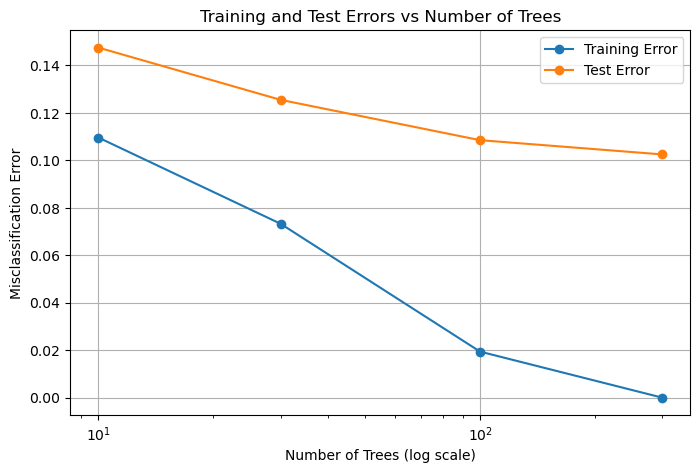

In [10]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Xtest.dat")

regression_trees = [10, 30, 100, 300]

model_names = []
train_error = []
test_error = []
times =[]

for k in regression_trees:
    start_time = time.time()
    
    model=GradientBoostingClassifier(n_estimators=k, random_state=42)
    model.fit(X, Y)

    train_err = 1 - model.score(X,Y)
    test_err = 1 - model.score(X_test, Y_test)
    
    total_t = time.time() - start_time
  
   
    model_names.append(f"GradientBoost-{k}")
    train_error.append(train_err)
    test_error.append(test_err)
    times.append(total_t)
    
    results_df = pd.DataFrame({
    "Model Name": model_names,
    "Training Error": train_error,
    "Test Error": test_error,
    "Training Time (s)": times,
    })

print(results_df)

min_test_error_index = test_error.index(min(test_error))
best_combination = {
    "Model Name": model_names[min_test_error_index],
    "Training Error": train_error[min_test_error_index],
    "Test Error": test_error[min_test_error_index],
    "Training Time (s)": times[min_test_error_index],
}
best_results_df = pd.DataFrame([best_combination])

print(best_results_df)

plt.figure(figsize=(8, 5))
plt.semilogx(regression_trees, train_error, marker='o', label="Training Error")
plt.semilogx(regression_trees, test_error, marker='o', label="Test Error")
plt.xlabel("Number of Trees (log scale)")
plt.ylabel("Misclassification Error")
plt.title("Training and Test Errors vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()

